github link - https://github.com/ral10001/RyanAIML/tree/master/Ensemble_Techniques

___

# Module 3 Project: Ensemble Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

### Univariate and Bivariate Analysis

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

Looking at data types to see if any categorical variables need to be made into dummy variables

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Checking data for nulls

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Looking at the distribution of the data for numerical columns and view the 5 important points of information

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


Visualizing the distribution of each numerical feature

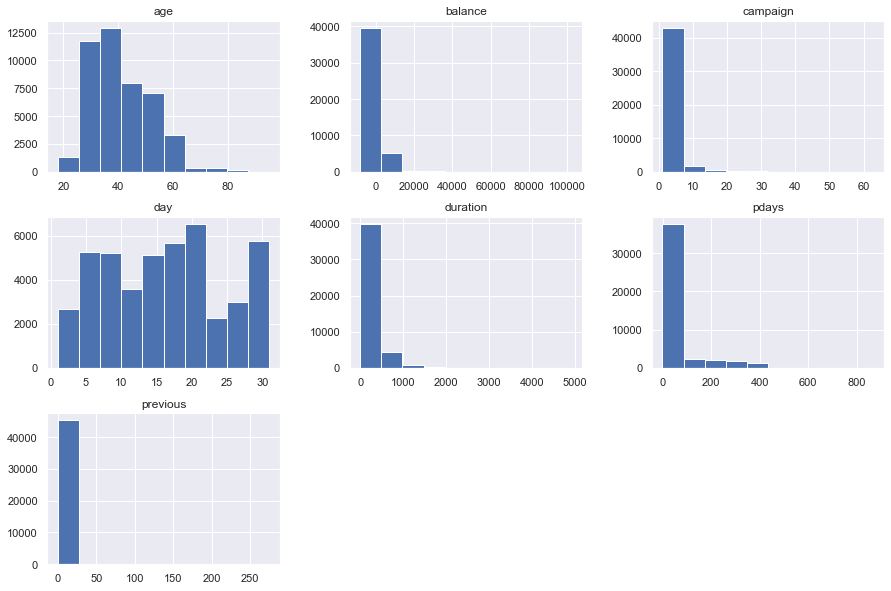

In [8]:
df.hist(figsize=(15, 10))
plt.show()

__Observations__
* Age is fairly normally distributed.  This tells me that the data is well balanced across a range of people.
* People seem to be contacted on all days of the month


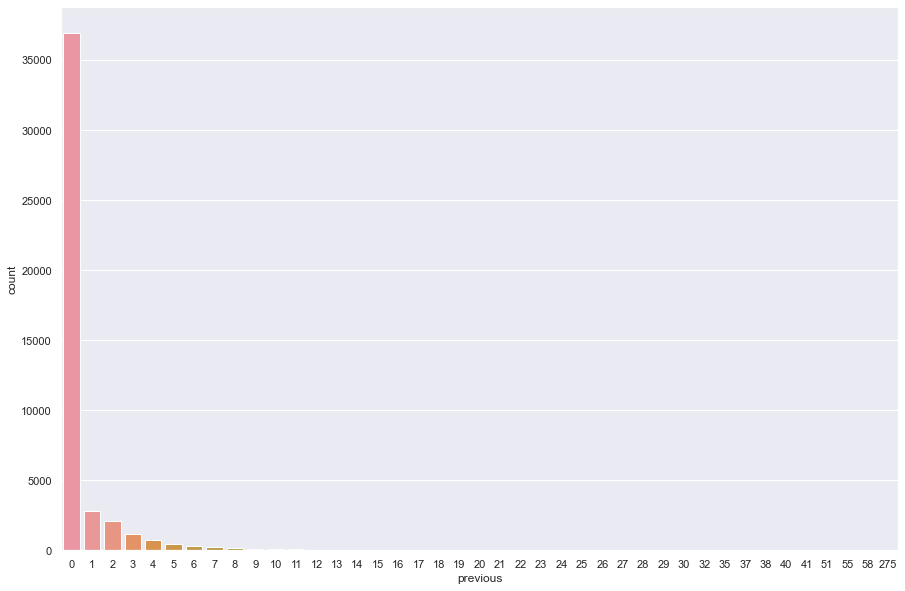

In [9]:
plt.figure(figsize=(15, 10))
sns.countplot(df['previous'])
plt.show()

In [10]:
print('Percent of people never contacted before the last campaign: ', \
      round((df[df['previous'] == 0]['previous'].count()/df['previous'].count()) * 100, 2), '%')

Percent of people never contacted before the last campaign:  81.74 %


* the majority of people have not been contacted prior to the most recent campaign to subscribe to term deposits

In [11]:
print('Percent of people who have never been contacted after a previous campaign, \n or have not been contacted in over 2.5 years : ', \
      round(df.groupby('pdays')['pdays'].count().iloc[0]/df['pdays'].count() * 100, 2),'%')

Percent of people who have never been contacted after a previous campaign, 
 or have not been contacted in over 2.5 years :  81.74 %


Visualizng distribution of people who did and did not subscribe to term deposits

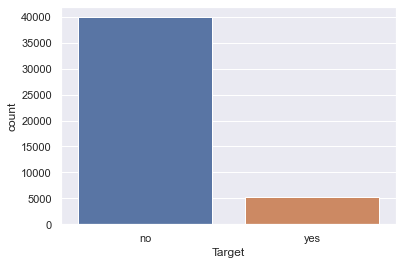

In [12]:
sns.countplot(df['Target'])
plt.show()

* the majority of people do not subscribe to deposits

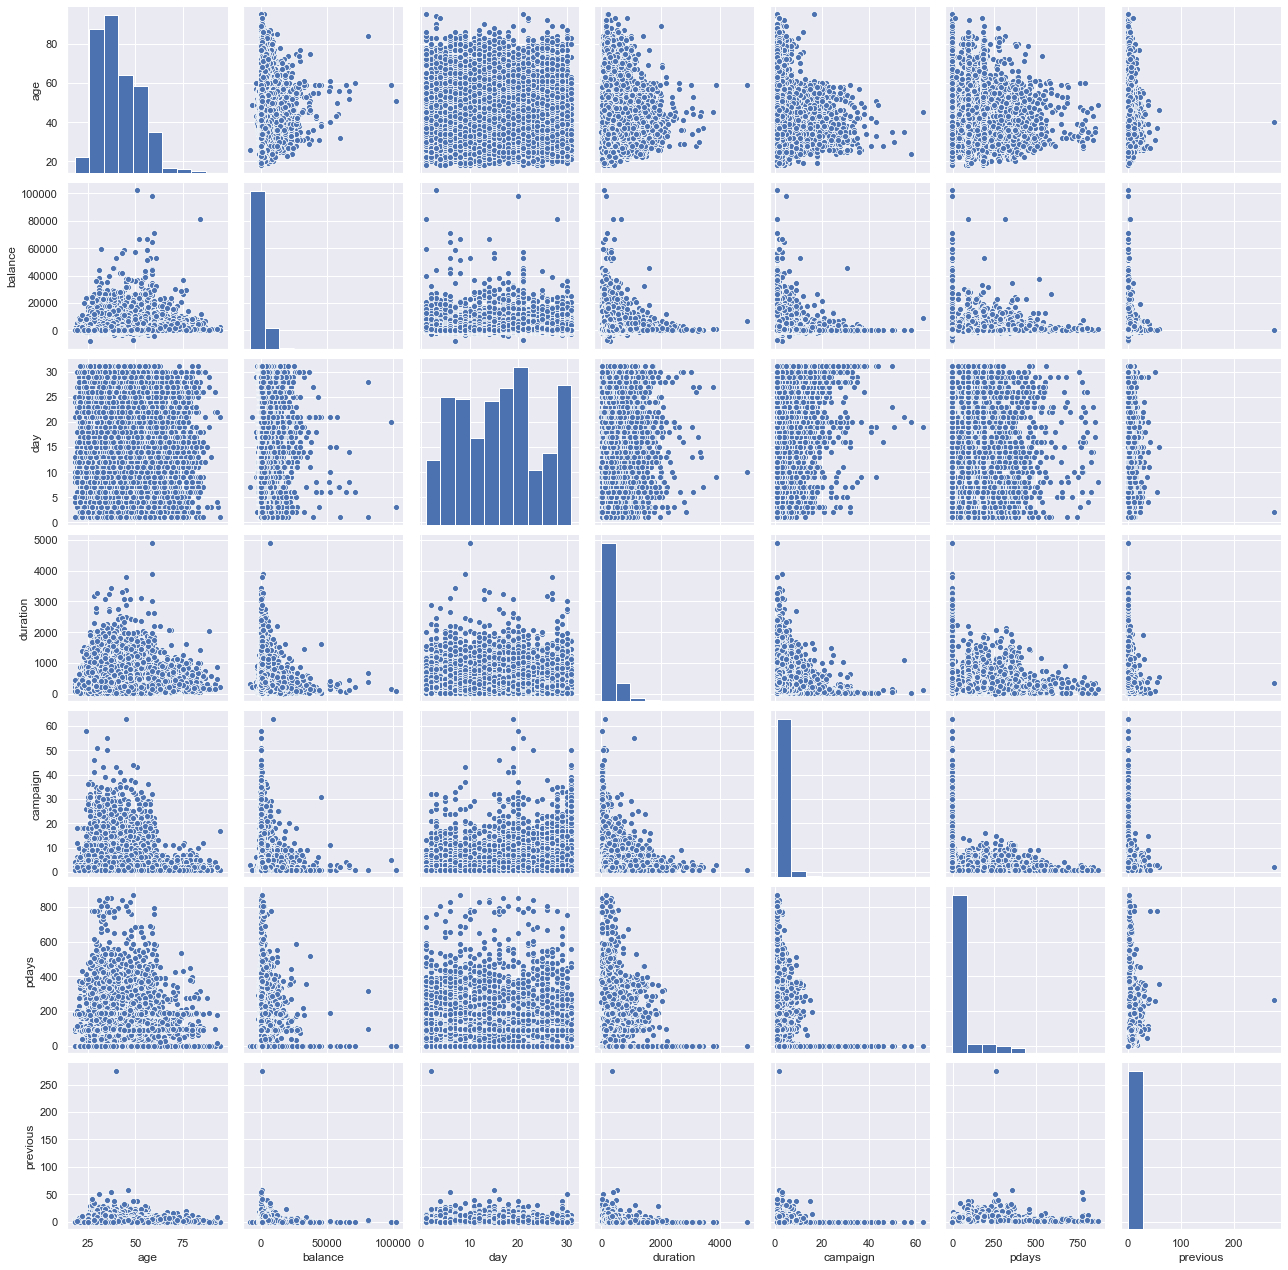

In [13]:
sns.pairplot(df)
plt.show()

Looking at the correlation of features and visualizing it in a heatmap

In [14]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


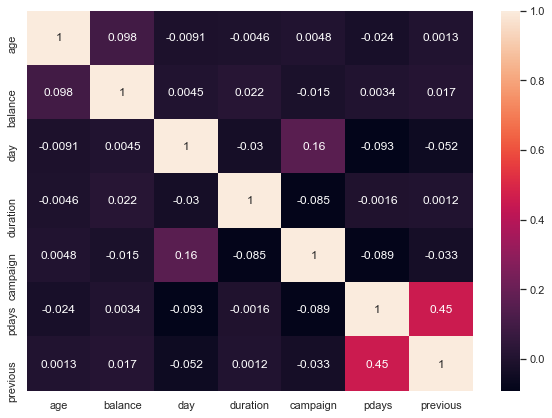

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

* There is a decent correlation between 'previous' and 'pdays'.  Consider dropping one of these features in the model.

Let us look at some boxplots to view outliers.  Previous, duration, and balance look like they may have a couple of outliers based on the scatterplots

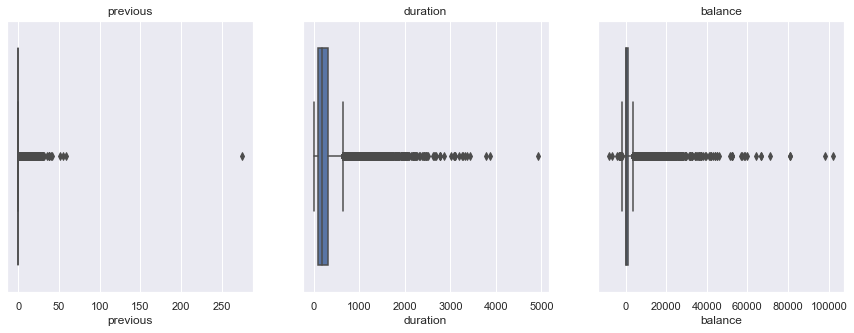

In [16]:
cols = ['previous', 'duration', 'balance']
fig, ax = plt.subplots(1,3, figsize=(15, 5))
n = 0

for c in cols:
    sns.boxplot(df[c], ax=ax[n])
    ax[n].set_title(c) 
    n += 1

plt.show()
    
#sns.boxplot(df[df['previous']>0]['previous'])
#plt.show()

* There is one major outlier for previous, and several outliers for duration and balance

Look at duration in minutes, and view the longest contacts

(df['duration']/60).sort_values().tail(20)

* several contacts are over an hour, but they don't seem worth removing to me

Look at balance for major outliers

In [17]:
df['balance'].sort_values().tail(10)

12926     58932
41374     59649
19420     64343
21192     66653
19785     66721
41693     71188
42558     81204
43393     81204
26227     98417
39989    102127
Name: balance, dtype: int64

* I am not going to drop any values here.  There are a lot of large numbers but of the large numbers they are grouped together close enough

In [18]:
df['previous'].max()

275

dropping the one record from 'previous'

In [19]:
df = df[df['previous']<250]

re-run the boxplot for 'previous'

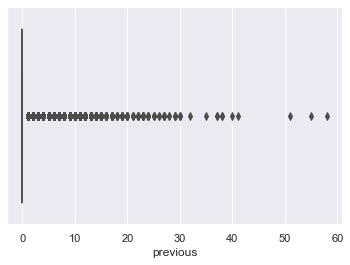

In [20]:
sns.boxplot(df['previous'])
plt.show()

* there are still outliers, but the grouping looks better without the largest point in 'previous'

In [21]:
df['previous'].max()

58

* the new maximum for 'previous' is significantly lower than before when it was at 275

### Prepare data for modeling 

In [22]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

* about half of the features are objects that need to be converted to numeric

View number of unique values for each categorical variable in the form of a dataframe

In [23]:
# use list comprehension to create lists of categorical features and number of unique values for each 

cat_feats = [i for i in df.dtypes.index if df.dtypes[i] == 'object' if i != 'Target']
vals = [i for i in df[cat_feats].nunique()]

In [24]:
# add these lists to a dataframe

pd.DataFrame({'Feature': cat_feats, '# Unique Values': vals})

,Feature,# Unique Values
0,job,12
1,marital,3
2,education,4
3,default,2
4,housing,2
5,loan,2
6,contact,3
7,month,12
8,poutcome,4


Look at the distribution for each categorical feature

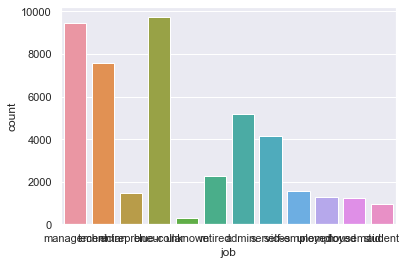

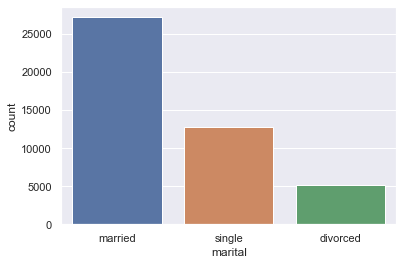

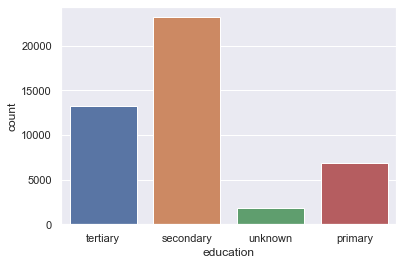

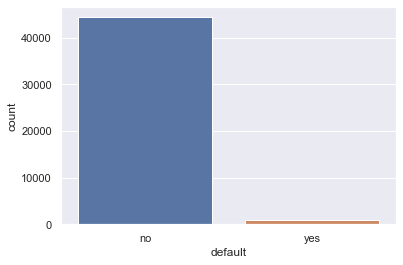

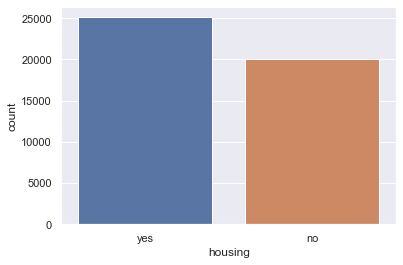

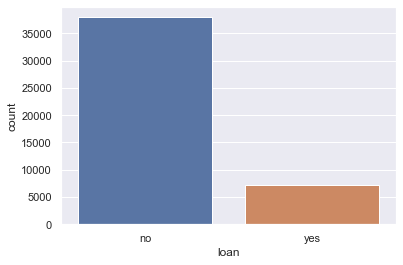

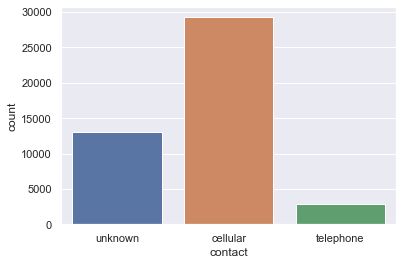

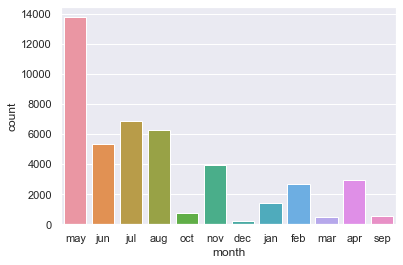

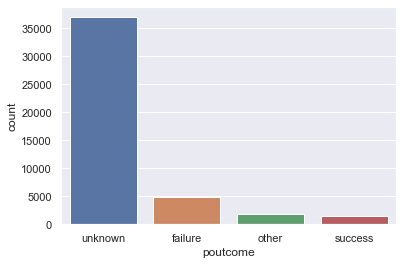

In [25]:
for c in cat_feats:
    sns.countplot(df[c])
    plt.show()


* default is mostly 'no'.  Consider dropping this feature.
* poutcome is mostly unknown.  Consider dropping the dummy feature poutcome_unknown or poutcome in general

Create dummy variables for each categorical variable

In [26]:
df2 = pd.get_dummies(df, columns=cat_feats)

convert Target variable to numeric

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df2['Target'] = le.fit_transform(df2['Target'])
df2['Target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45210, dtype: int64

I am choosing not to scale any of the features

Import libraries for modeling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

Create X and y variables

In [30]:
X = df2.drop('Target', axis=1)
y = df2['Target']

Split the data into training and testing sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size = 0.3)

### Model Creation

##### Logistic Regression

Create and fit the Logistic Regression object to the training data. Save the predictions to a variable for scoring.

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [33]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

scores = [acc, prec, rec, f1, roc_auc]
mets = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC/AUC']

metrics_df = pd.DataFrame({'Metrics': mets, 'Scores': scores})
metrics_df

,Metrics,Scores
0,Accuracy,0.89
1,Precision,0.61
2,Recall,0.23
3,F1 Score,0.33
4,ROC/AUC,0.60


* recall and F1 are very low for this model

Visualize the results in a confusion matrix

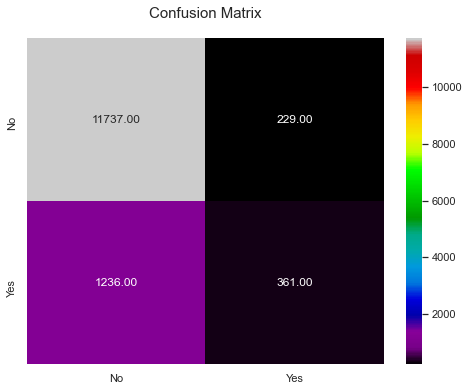

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cmap='nipy_spectral', xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
ax.set_title('Confusion Matrix', fontdict={'fontsize': 15}, pad=20)
plt.show()

The biggest issue seems to be false positives.  1236 predictions were made saying the subscription was accepted when it in fact was not.  This explains the poor recall 
* Recall: TP/(TP+FN)

##### Decision Tree

Create the model object and fit to data

In [35]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=14)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=14)

In [36]:
dt_pred = dt_model.predict(X_test)

Create Metrics dataframe and confusion matrix similar to Logistic Regression

In [37]:
acc = accuracy_score(y_test, dt_pred)
prec = precision_score(y_test, dt_pred)
rec = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
roc_auc = roc_auc_score(y_test, dt_pred)

dt_scores = [acc, prec, rec, f1, roc_auc]
dt_mets = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC/AUC']

dt_metrics_df = pd.DataFrame({'Metrics': dt_mets, 'Scores': dt_scores})
dt_metrics_df

,Metrics,Scores
0,Accuracy,0.88
1,Precision,0.47
2,Recall,0.50
3,F1 Score,0.49
4,ROC/AUC,0.71


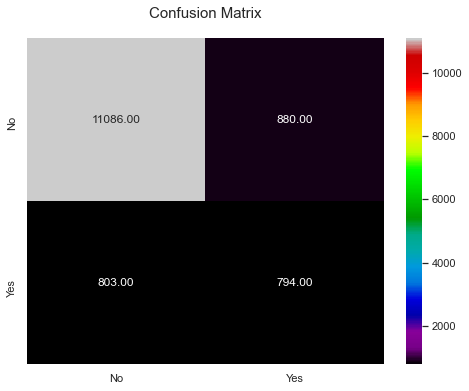

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cmap='nipy_spectral', xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
ax.set_title('Confusion Matrix', fontdict={'fontsize': 15}, pad=20)
plt.show()

* Decision tree does a bit better with precision and recall

Show dataframe of feature importance

In [39]:
pd.DataFrame(dt_model.feature_importances_, columns=['Feature Importance'], index = X_train.columns)

,Feature Importance
age,0.08
balance,0.10
day,0.09
duration,0.29
campaign,0.03
pdays,0.04
previous,0.01
job_admin.,0.01
job_blue-collar,0.00
job_entrepreneur,0.00


### Boosting and Bagging

#### Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', random_state=14, max_depth=20, min_samples_leaf=3)

In [41]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [42]:
acc = accuracy_score(y_test, rf_pred)
prec = precision_score(y_test, rf_pred)
rec = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
roc_auc = roc_auc_score(y_test, rf_pred)

rf_scores = [acc, prec, rec, f1, roc_auc]
rf_mets = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC/AUC']

rf_metrics_df = pd.DataFrame({'Metrics': rf_mets, 'Scores': rf_scores})
rf_metrics_df

,Metrics,Scores
0,Accuracy,0.91
1,Precision,0.72
2,Recall,0.35
3,F1 Score,0.47
4,ROC/AUC,0.67


#### Adaboost Ensemble Algorithm

In [43]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=None, n_estimators=35, learning_rate=0.7, random_state=14)

In [44]:
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=35, random_state=14)

In [45]:
ab_pred = abc.predict(X_test)

In [46]:
acc = accuracy_score(y_test, ab_pred)
prec = precision_score(y_test, ab_pred)
rec = recall_score(y_test, ab_pred)
f1 = f1_score(y_test, ab_pred)
roc_auc = roc_auc_score(y_test, ab_pred)

ab_scores = [acc, prec, rec, f1, roc_auc]
ab_mets = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC/AUC']

ab_metrics_df = pd.DataFrame({'Metrics': ab_mets, 'Scores': ab_scores})
ab_metrics_df

,Metrics,Scores
0,Accuracy,0.90
1,Precision,0.66
2,Recall,0.38
3,F1 Score,0.48
4,ROC/AUC,0.68


#### Bagging Classifier Algorithm

In [47]:
from sklearn.ensemble import BaggingClassifier

In [48]:
bc = BaggingClassifier(base_estimator=dt_model, random_state=14, bootstrap=False, n_estimators=30, max_samples=.6)

In [49]:
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)


In [50]:
bc_pred = bc.predict(X_test)

In [51]:
acc = accuracy_score(y_test, bc_pred)
prec = precision_score(y_test, bc_pred)
rec = recall_score(y_test, bc_pred)
f1 = f1_score(y_test, bc_pred)
roc_auc = roc_auc_score(y_test, bc_pred)

bc_scores = [acc, prec, rec, f1, roc_auc]
bc_mets = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC/AUC']

bc_metrics_df = pd.DataFrame({'Metrics': bc_mets, 'Scores': bc_scores})
bc_metrics_df

,Metrics,Scores
0,Accuracy,0.91
1,Precision,0.64
2,Recall,0.48
3,F1 Score,0.55
4,ROC/AUC,0.72


#### GradientBoost Classifier Algorithm 

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gb = GradientBoostingClassifier(random_state=14, n_estimators=30, learning_rate = 0.4)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=30, random_state=14)

In [54]:
gb_pred = gb.predict(X_test)

In [55]:
acc = accuracy_score(y_test, gb_pred)
prec = precision_score(y_test, gb_pred)
rec = recall_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
roc_auc = roc_auc_score(y_test, gb_pred)

gb_scores = [acc, prec, rec, f1, roc_auc]
gb_mets = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC/AUC']

gb_metrics_df = pd.DataFrame({'Metrics': gb_mets, 'Scores': gb_scores})
gb_metrics_df

,Metrics,Scores
0,Accuracy,0.91
1,Precision,0.67
2,Recall,0.44
3,F1 Score,0.53
4,ROC/AUC,0.71


#### Dataframe comparing models

In [56]:
final_scores = pd.DataFrame(columns=['Metrics', 'Logistic', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Bagging', 'Gradient Boost'])
all_scores = [metrics_df['Metrics'], metrics_df['Scores'], dt_metrics_df['Scores'], rf_metrics_df['Scores'], \
                ab_metrics_df['Scores'], bc_metrics_df['Scores'], gb_metrics_df['Scores']]
for c, s in zip(final_scores.columns, all_scores):
    final_scores[c] = s.values

In [57]:
final_scores

,Metrics,Logistic,Decision Tree,Random Forest,AdaBoost,Bagging,Gradient Boost
0,Accuracy,0.89,0.88,0.91,0.90,0.91,0.91
1,Precision,0.61,0.47,0.72,0.66,0.64,0.67
2,Recall,0.23,0.50,0.35,0.38,0.48,0.44
3,F1 Score,0.33,0.49,0.47,0.48,0.55,0.53
4,ROC/AUC,0.60,0.71,0.67,0.68,0.72,0.71


* The best models based on accuracy are Random Forest, Bagging, and Gradient Boost
* Random Forest is brought down by it's poor recall, which is actually worse than the Decision Tree recall
* If I had to __choose one model__, it would be Bagging.  It has the best accuracy and F1 score.
* With further tuning of hyperparameters and features Bagging (and really all of these models) could probably be improved.

___